In [1]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Load the data
tensile_df =  pd.read_excel("../Tensile_Properties_Data.xlsx", header=0, skiprows=1)
tensile_df

,Reference,Material,Material Group,C (wt.%),Si (wt.%),Mn (wt.%),P (wt.%),S (wt.%),Ni (wt.%),Cr (wt.%),...,Width (mm),Aspect Ratio (L/W),Aspect Ratio (R/W),Aspect Ratio (T/W),Test Temperature (C),Strain Rate (1/s),Yield Strength (MPa),Ultimate Tensile Strength (MPa),Uniform Elongation (%),Total Elongation (%)
0,1,SS304L,"NSM, Rector Internals",0.02,0.45,1.30,NaN,NaN,8.02,18.30,...,1.2,4.166700,1.1667,0.625000,23.0,0.001000,274.0,789.0,67.00,76.00
1,1,SS304L,"NSM, Rector Internals",0.02,0.45,1.30,NaN,NaN,8.02,18.30,...,0.8,4.437500,0.3750,0.500000,23.0,0.001000,272.0,781.0,69.00,80.00
2,1,FeCrAl,"NSM, Fuel Cladding",NaN,0.13,NaN,NaN,NaN,NaN,13.10,...,1.2,4.166700,1.1667,0.416667,23.0,0.001000,710.0,767.0,7.90,14.80
3,1,FeCrAl,"NSM, Fuel Cladding",NaN,0.13,NaN,NaN,NaN,NaN,13.10,...,0.8,3.187500,0.3750,0.500000,23.0,0.001000,607.0,760.0,10.80,23.10
4,1,FeCrAl,"NSM, Fuel Cladding",NaN,0.13,NaN,NaN,NaN,NaN,13.10,...,0.8,3.187500,0.3750,0.500000,23.0,0.001000,725.0,782.0,6.60,18.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,114.0,0.222807,NaN,0.114035,760.0,0.000067,214.0,572.0,59.35,67.66
1469,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,NaN,NaN,NaN,NaN,760.0,0.000067,207.0,494.0,38.80,47.80
1470,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,NaN,NaN,NaN,NaN,760.0,0.003667,101.0,352.0,31.22,47.25
1471,27,SS316,SS316,0.065,0.31,1.75,0.025,0.0175,13.50,17.00,...,25.0,2.032000,NaN,0.000000,760.0,0.000067,177.0,497.0,40.40,46.50


In [3]:
# Check the data information for each column.
tensile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reference                        1473 non-null   int64  
 1   Material                         1473 non-null   object 
 2   Material Group                   1473 non-null   object 
 3   C (wt.%)                         1210 non-null   object 
 4   Si (wt.%)                        1174 non-null   float64
 5   Mn (wt.%)                        1179 non-null   float64
 6   P (wt.%)                         1157 non-null   float64
 7   S (wt.%)                         965 non-null    float64
 8   Ni (wt.%)                        1387 non-null   float64
 9   Cr (wt.%)                        1404 non-null   float64
 10  Mo (wt.%)                        1331 non-null   float64
 11  Al (wt.%)                        484 non-null    float64
 12  N (wt.%)            

In [4]:
# Select the composition columns
compostion_cols = tensile_df.columns[3:29]
compostion_cols

Index(['C (wt.%)', 'Si (wt.%)', 'Mn (wt.%)', 'P (wt.%)', 'S (wt.%)',
       'Ni (wt.%)', 'Cr (wt.%)', 'Mo (wt.%)', 'Al (wt.%)', 'N (wt.%)',
       'Ti (wt.%)', 'Fe (wt.%)', 'Nb (wt.%)', 'B (wt.%)', 'Cu (wt.%)',
       'V (wt.%)', 'Mg (wt.%)', 'Y (wt.%)', 'Zr (wt.%)', 'Zn (wt.%)',
       'W (wt.%)', 'Sn (wt.%)', 'Co (wt.%)', 'O (wt.,%)', 'Ta (wt.%)',
       'H (wt.%)'],
      dtype='object')

In [5]:
# Fill the nan values with 0 for the comospition columns
tensile_df[compostion_cols]  = tensile_df[compostion_cols].fillna(0)
tensile_df['Irradiation Dose (mdpa)']  = tensile_df['Irradiation Dose (mdpa)'].fillna(0)
tensile_df['Irradiation Temperature (C)']  = tensile_df['Irradiation Temperature (C)'].fillna(0)

In [6]:
# Displace the latest dataframe information
tensile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reference                        1473 non-null   int64  
 1   Material                         1473 non-null   object 
 2   Material Group                   1473 non-null   object 
 3   C (wt.%)                         1473 non-null   object 
 4   Si (wt.%)                        1473 non-null   float64
 5   Mn (wt.%)                        1473 non-null   float64
 6   P (wt.%)                         1473 non-null   float64
 7   S (wt.%)                         1473 non-null   float64
 8   Ni (wt.%)                        1473 non-null   float64
 9   Cr (wt.%)                        1473 non-null   float64
 10  Mo (wt.%)                        1473 non-null   float64
 11  Al (wt.%)                        1473 non-null   float64
 12  N (wt.%)            

In [7]:
# Displace the unique values of the Zr, C and Fe compositions, 
# the initial data collection contains some < signs or ppm, bal, we want to check if these columns have this sign.
print('unique values for Zr (wt.%) column:' + str(tensile_df['Zr (wt.%)'].unique()))
print(100*'_')
print('unique values for C (wt.%) column:' + str(tensile_df['C (wt.%)'].unique()))
print(100*'_')
print('unique values for Fe (wt.%) column:' + str(tensile_df['Fe (wt.%)'].unique()))

unique values for Zr (wt.%) column:[0 98.173 'bal' 1.44]
____________________________________________________________________________________________________
unique values for C (wt.%) column:[0.02 0 0.018 0.01 0.21 0.09 0.055 0.17 0.24 0.07 0.1 0.2 0.14 0.006 0.136
 0.098 0.03 0.18 0.036 '150-400ppm' '<40 ppm' 0.12 0.064 0.061 0.063 0.06
 0.05 0.04 0.058 0.009 0.008 0.014 0.065 0.066 0.053 0.048 0.057 0.039
 0.043 0.041]
____________________________________________________________________________________________________
unique values for Fe (wt.%) column:[71.836 79.41 18.7 0.35 0.2 68.052 57.980000000000004 96.828 90.174
 63.537800000000004 86.78999999999999 97.71 96.978 70.77 96.504 99.13 0
 0.25 86.326 89.53999999999999 67.9 97.1003 94.904 71.089 0.165 '<0.6'
 99.19 64.94000000000001 52.6088 58.8682 66.80699999999999 63.4728 96.843
 67.36000000000001 68.90299999999999 65.57600000000001 64.889 72.245
 70.85600000000001 70.856 67.656 64.6745 66.408 64.62395 66.038 66.252
 65.054 65.15

In [8]:
# Remove the data with <, ppm and bal text in these there columns. 
tensile_df = tensile_df[~tensile_df['Zr (wt.%)'].isin(['<','ppm','bal'])]
tensile_df = tensile_df[~tensile_df['C (wt.%)'].isin(['<','ppm','bal'])]
tensile_df = tensile_df[~tensile_df['Fe (wt.%)'].isin(['<','ppm','bal'])]

In [9]:
# Check the data again, make sure  the data is cleaned
print('unique values for Zr (wt.%) column:' + str(tensile_df['Zr (wt.%)'].unique()))
print(100*'_')
print('unique values for C (wt.%) column:' + str(tensile_df['C (wt.%)'].unique()))
print(100*'_')
print('unique values for Fe (wt.%) column:' + str(tensile_df['Fe (wt.%)'].unique()))

unique values for Zr (wt.%) column:[0 98.173 1.44]
____________________________________________________________________________________________________
unique values for C (wt.%) column:[0.02 0 0.018 0.01 0.21 0.09 0.055 0.17 0.24 0.07 0.1 0.2 0.14 0.006 0.136
 0.098 0.03 0.18 0.036 0.12 0.064 0.061 0.063 0.06 0.05 0.04 0.058 0.009
 0.008 0.014 0.065 0.066 0.053 0.048 0.057 0.039 0.043 0.041]
____________________________________________________________________________________________________
unique values for Fe (wt.%) column:[71.836 79.41 18.7 0.35 0.2 68.052 57.980000000000004 96.828 90.174
 63.537800000000004 86.78999999999999 97.71 96.978 70.77 96.504 99.13 0
 0.25 86.326 89.53999999999999 67.9 97.1003 94.904 71.089 99.19
 64.94000000000001 52.6088 58.8682 66.80699999999999 63.4728 96.843
 67.36000000000001 68.90299999999999 65.57600000000001 64.889 72.245
 70.85600000000001 70.856 67.656 64.6745 66.408 64.62395 66.038 66.252
 65.054 65.1522 65.0159999999999 65.7088 64.6432 64.9213

In [10]:
# convert all of the composition columns' data type to float
tensile_df[compostion_cols]  = tensile_df[compostion_cols].astype(float)

In [11]:
# Select all the sub-sized type ss316  samples.
tensile_df  = tensile_df[(tensile_df['Material Group'].str.contains('ss316', case=False))& (tensile_df['Specimen Size'] == 'Sub-sized')]

In [12]:
# check the data again.
tensile_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 21 to 989
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reference                        556 non-null    int64  
 1   Material                         556 non-null    object 
 2   Material Group                   556 non-null    object 
 3   C (wt.%)                         556 non-null    float64
 4   Si (wt.%)                        556 non-null    float64
 5   Mn (wt.%)                        556 non-null    float64
 6   P (wt.%)                         556 non-null    float64
 7   S (wt.%)                         556 non-null    float64
 8   Ni (wt.%)                        556 non-null    float64
 9   Cr (wt.%)                        556 non-null    float64
 10  Mo (wt.%)                        556 non-null    float64
 11  Al (wt.%)                        556 non-null    float64
 12  N (wt.%)                  

In [13]:
# Drop the columns that don't have  enough data records.
tensile_df = tensile_df.drop(columns=[ 'Reference','Manufacturing','Cooling', 'Material', 'Treatment', 'Specimen Size Type',
                                     'Irradiation Time (h)', 'Fillet Radius (mm)', 'Specimen Size',
                                       'Post Treatment Temperature (C)','Post Treatment Time (h)','Microstructure', 'Aspect Ratio (R/W)', 'Yield Strength (MPa)',
                                       'Ultimate Tensile Strength (MPa)', 'Uniform Elongation (%)','Specimen Shape'
                                       ])


In [14]:
# Dpsplay the latest dataframe information.
tensile_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 21 to 989
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Material Group                556 non-null    object 
 1   C (wt.%)                      556 non-null    float64
 2   Si (wt.%)                     556 non-null    float64
 3   Mn (wt.%)                     556 non-null    float64
 4   P (wt.%)                      556 non-null    float64
 5   S (wt.%)                      556 non-null    float64
 6   Ni (wt.%)                     556 non-null    float64
 7   Cr (wt.%)                     556 non-null    float64
 8   Mo (wt.%)                     556 non-null    float64
 9   Al (wt.%)                     556 non-null    float64
 10  N (wt.%)                      556 non-null    float64
 11  Ti (wt.%)                     556 non-null    float64
 12  Fe (wt.%)                     556 non-null    float64
 13  Nb (wt.%)

In [15]:
# remove nan values from the dataset
tensile_df = tensile_df.dropna()
tensile_df = tensile_df.reset_index(drop=True)
tensile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Material Group                190 non-null    object 
 1   C (wt.%)                      190 non-null    float64
 2   Si (wt.%)                     190 non-null    float64
 3   Mn (wt.%)                     190 non-null    float64
 4   P (wt.%)                      190 non-null    float64
 5   S (wt.%)                      190 non-null    float64
 6   Ni (wt.%)                     190 non-null    float64
 7   Cr (wt.%)                     190 non-null    float64
 8   Mo (wt.%)                     190 non-null    float64
 9   Al (wt.%)                     190 non-null    float64
 10  N (wt.%)                      190 non-null    float64
 11  Ti (wt.%)                     190 non-null    float64
 12  Fe (wt.%)                     190 non-null    float64
 13  Nb (w

In [16]:
# sort the dataframe by Ultimate Tensile Strength values.
tensile_df = tensile_df.sort_values(by='Total Elongation (%)').reset_index(drop=True)


In [17]:
# Select columns for modeling.

input_features_df =  tensile_df.drop(columns=['Total Elongation (%)'])

In [18]:
# Encode the categorical columns
input_features_df['Material Group'] = input_features_df['Material Group'].astype('category')
input_features_df['Material Group'] = input_features_df['Material Group'].cat.codes

input_features_df['Treatment – Three Categories'] = input_features_df['Treatment – Three Categories'].astype('category')
input_features_df['Treatment – Three Categories'] = input_features_df['Treatment – Three Categories'].cat.codes

In [19]:
# make sure all the input data is float data type.
input_features_df = input_features_df.astype('float')

In [20]:
# define the input X and input Y values.
features = input_features_df
targets = tensile_df['Total Elongation (%)']

Run # 1 Fold # 1
Pearson CC: 0.9060508331784296
R2 score: 0.8189755668793891
RMSE: 8.762234181949056
MAE: 6.20029953546157


c:\Users\LZ\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\core.py:160: UserWarning: [21:23:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


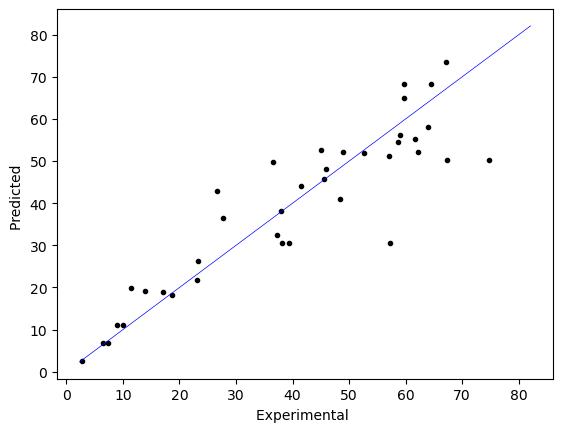

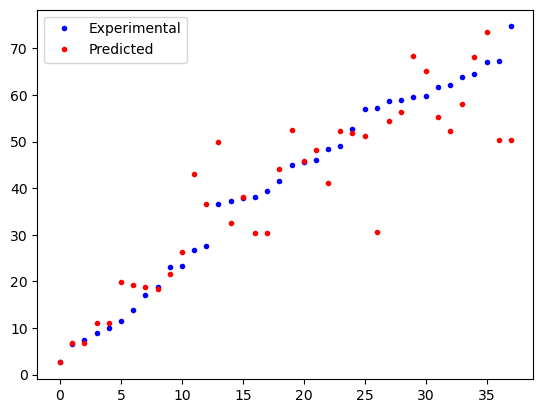

Run # 1 Fold # 2
Pearson CC: 0.9823732975938178
R2 score: 0.9646204111043675
RMSE: 4.39862173122765
MAE: 3.405067981910448


c:\Users\LZ\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\core.py:160: UserWarning: [21:23:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


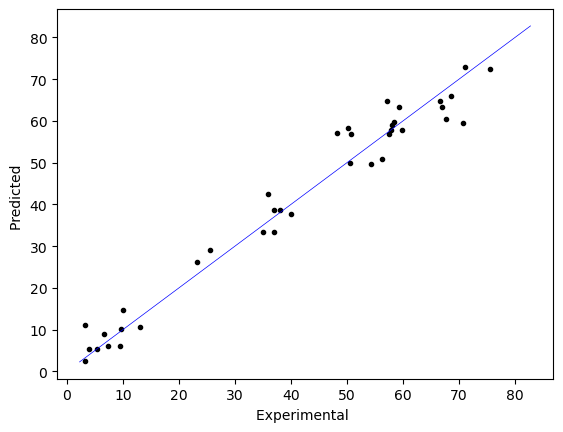

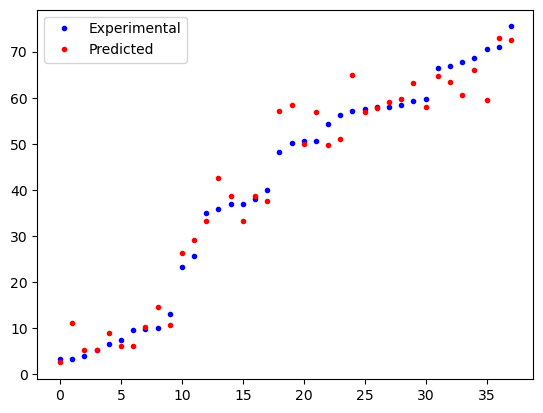

Run # 1 Fold # 3
Pearson CC: 0.9792196229825527
R2 score: 0.9574227069660235
RMSE: 5.203130998470115
MAE: 3.4109856714496503


c:\Users\LZ\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\core.py:160: UserWarning: [21:23:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


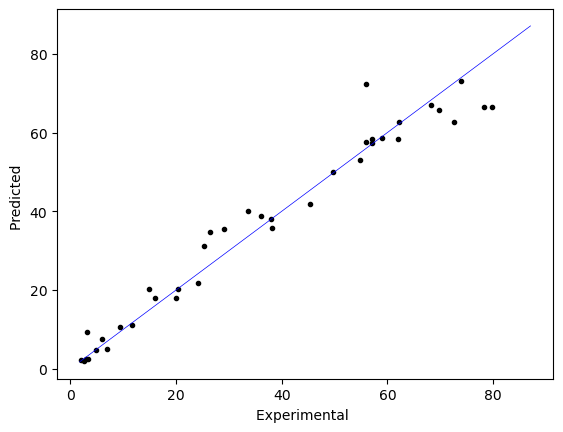

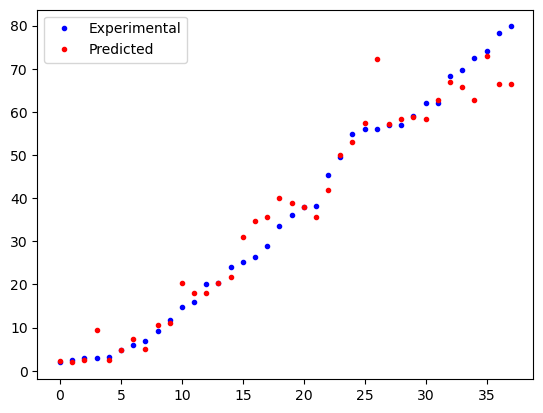

Run # 1 Fold # 4
Pearson CC: 0.8515760225270406
R2 score: 0.7176233927523044
RMSE: 11.379070008003419
MAE: 7.195367264639812


c:\Users\LZ\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\core.py:160: UserWarning: [21:23:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


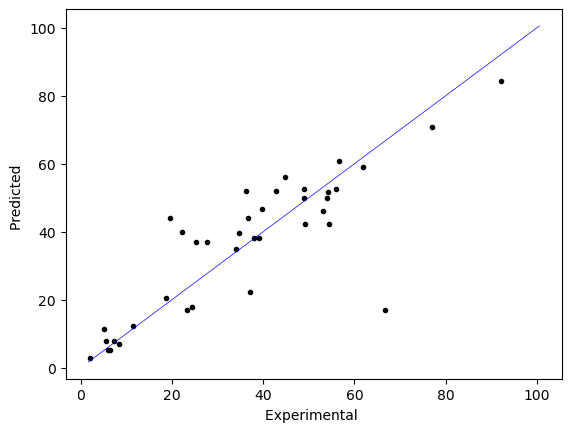

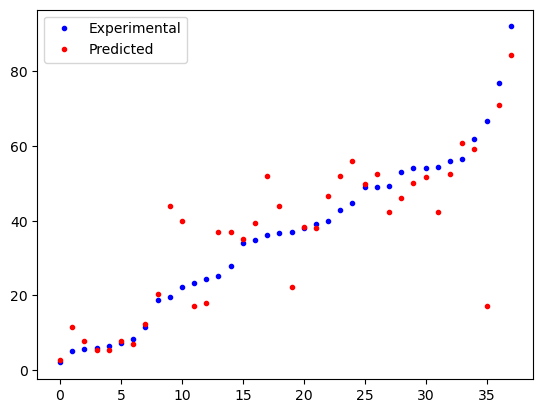

Run # 1 Fold # 5
Pearson CC: 0.9445069417517655
R2 score: 0.891283193460083
RMSE: 6.645050117434202
MAE: 4.740022991206011


c:\Users\LZ\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\core.py:160: UserWarning: [21:23:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


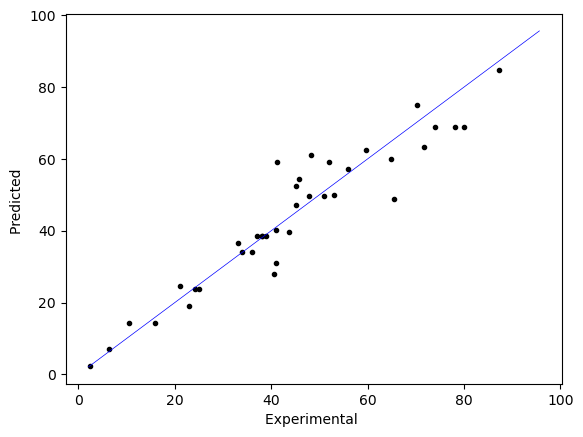

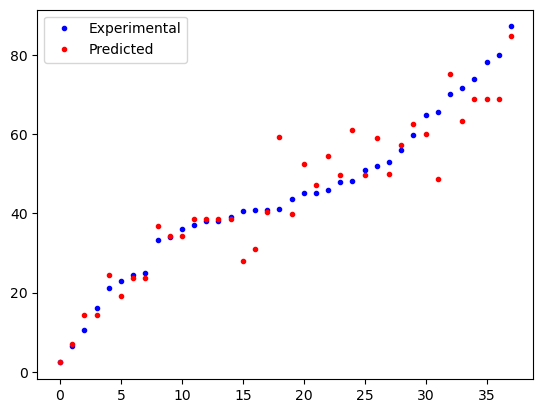

In [21]:
# XGBoost Model
import xgboost as xg

nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
MSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = StandardScaler()
            x_train = scale.fit_transform(x_train)
            x_test = scale.transform(x_test)

            # Initialize LightGBM Regressor
            xgboost_regressor = xg.XGBRegressor(objective ='reg:linear',
                                                colsample_bytree = 0.3,
                                                learning_rate = 0.1,
                                                max_depth = 5,
                                                alpha = 5,
                            n_estimators=1000, seed = 123)

            # Train the model
            xgboost_regressor.fit(x_train, y_train)

            # Make predictions on the testing set
            y_pred = xgboost_regressor.predict(x_test)

            # Evaluation
            R2_score[j, i] = r2_score(y_test, y_pred)
            PearsonCC[j, i] =  pearsonr(y_test, np.squeeze(y_pred))[0]
            MSE[j, i] = np.sqrt(mean_squared_error(y_test, y_pred))
            MAE[j, i] = mean_absolute_error(y_test, y_pred)

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {MSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')


            # Parity plot, actual versus predicted values
            plt.plot(y_test, y_pred, 'k.')
            bounds = (min(y_test.min(), y_pred.min()) - 0.1*y_pred.min(), max(y_test.max(), y_pred.max())+ 0.1 * y_pred.max())
            plt.plot([bounds[0], bounds[1]], [bounds[0], bounds[1]],'b-', linewidth=0.5, label="Parity Line") # identity line
            plt.xlabel("Experimental ", fontsize=10)
            plt.ylabel("Predicted ", fontsize=10)
            plt.show()

            plt.plot(np.array(y_test), 'b.', label='Experimental')
            plt.plot(np.array(y_pred), 'r.', label='Predicted')
            plt.legend()
            plt.show()

In [22]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'MSE': MSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,MSE,MAE
0,0.906051,0.818976,8.762234,6.200300
1,0.982373,0.964620,4.398622,3.405068
2,0.979220,0.957423,5.203131,3.410986
3,0.851576,0.717623,11.379070,7.195367
4,0.944507,0.891283,6.645050,4.740023


In [23]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
MSE_mean = np.mean(MSE)
MAE_mean = np.mean(MAE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
MSE_std = np.std(MSE)
MAE_std = np.std(MAE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'MSE Mean': MSE_mean, 'MSE Std': MSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std },index=[0])

df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,MSE Mean,MSE Std,MAE Mean,MAE Std
0,0.932745,0.049117,0.869985,0.092597,7.277621,2.530543,4.990349,1.509719


Run # 1 Fold # 1
Pearson CC: 0.8659173655132254
R2 score: 0.7431641440128285
RMSE: 10.436961585662296
MAE: 7.067750868746502


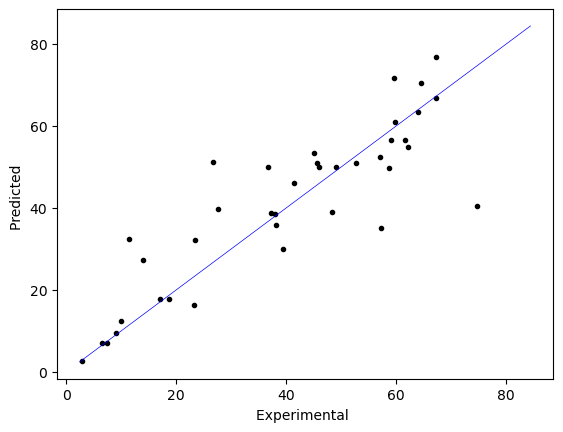

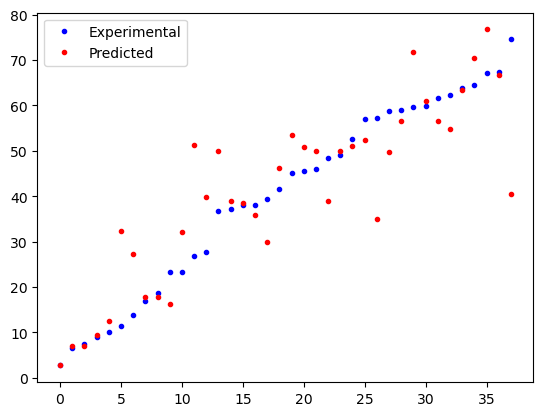

Run # 1 Fold # 2
Pearson CC: 0.9631346541028809
R2 score: 0.9073160974371056
RMSE: 7.119383380159127
MAE: 5.514276070130215


c:\Users\LZ\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\gaussian_process\kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


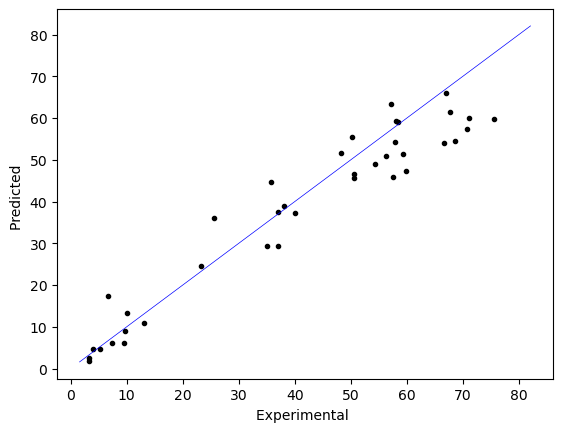

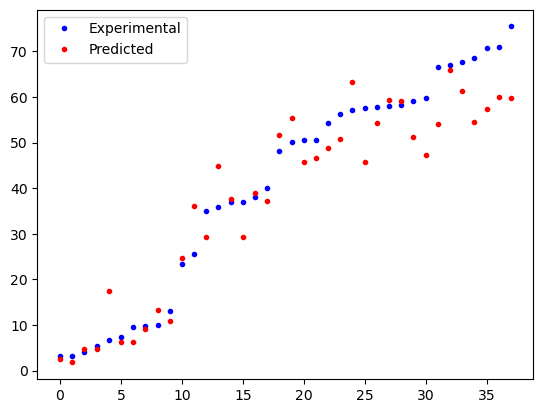

Run # 1 Fold # 3
Pearson CC: 0.9661075029520824
R2 score: 0.9320932706948659
RMSE: 6.571010234670901
MAE: 4.6150679752982855


c:\Users\LZ\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\gaussian_process\kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


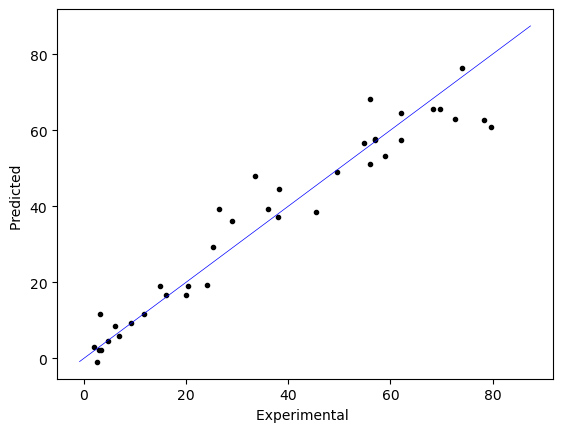

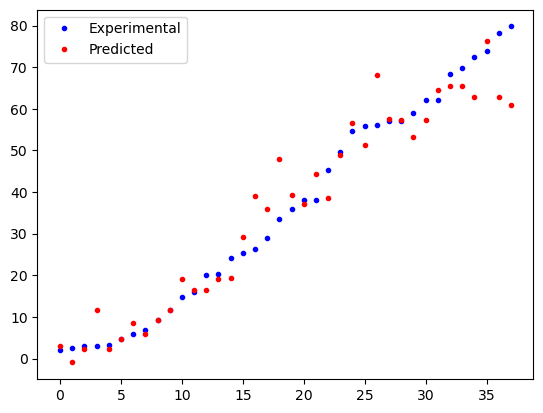

Run # 1 Fold # 4
Pearson CC: 0.8093647076241534
R2 score: 0.6384498475558289
RMSE: 12.875873044617506
MAE: 9.191807296849268


c:\Users\LZ\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\gaussian_process\kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


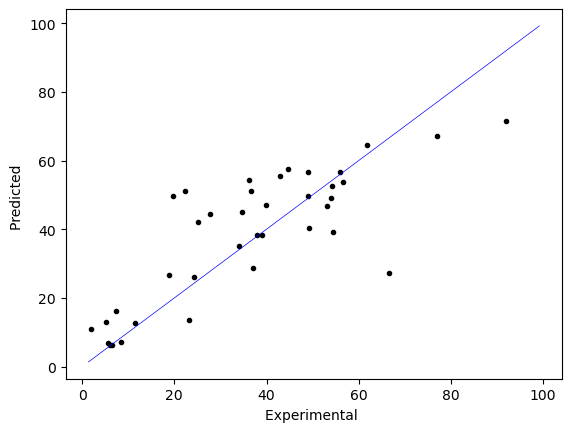

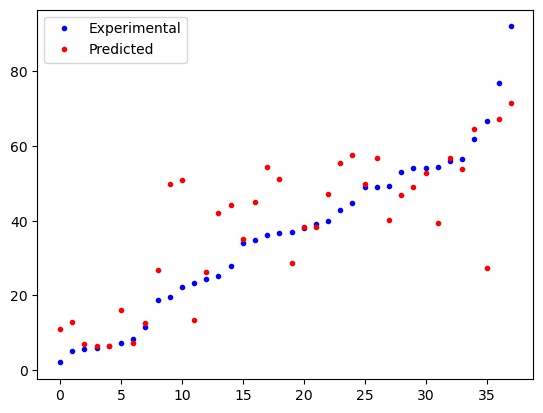

Run # 1 Fold # 5
Pearson CC: 0.9358987709446993
R2 score: 0.8725304408508172
RMSE: 7.195370465741262
MAE: 5.121784923491073


c:\Users\LZ\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\gaussian_process\kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


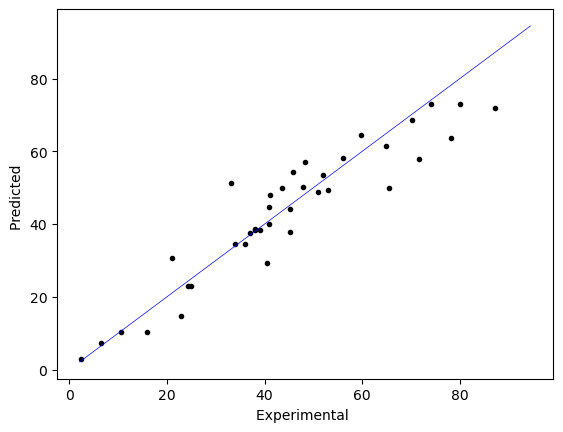

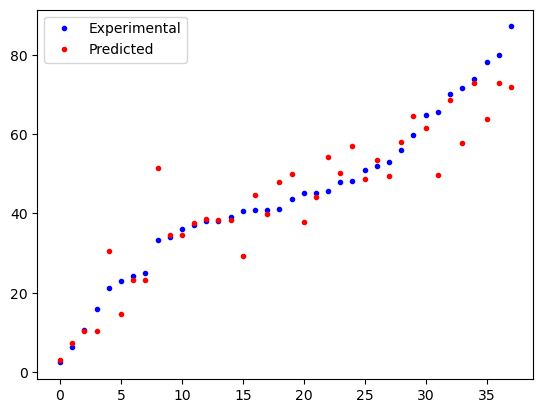

In [24]:
# Gaussian Process Regression Model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, DotProduct, ConstantKernel as C

nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
MSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)
        kernel = C(0.5) * Matern(length_scale=1.0, nu=1.0) + WhiteKernel(noise_level=0.5) + C(0.5) * DotProduct(sigma_0=0.5)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = StandardScaler()
            x_train = scale.fit_transform(x_train)
            x_test = scale.transform(x_test)

            # Initialize GP Regressor


            model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, normalize_y=True)

            model.fit(x_train, y_train)

            mu_z, std_z = model.predict(x_test, return_std=True)
            y_pred_test = mu_z
            y_pred_unc_test = std_z

            # Evaluation
            R2_score[j, i] = r2_score(y_test, y_pred_test)
            PearsonCC[j, i] =  pearsonr(y_test, np.squeeze(y_pred_test))[0]
            MSE[j, i] = np.sqrt(mean_squared_error(y_test, y_pred_test))
            MAE[j, i] = mean_absolute_error(y_test, y_pred_test)

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {MSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')


            # Parity plot, actual versus predicted values
            plt.plot(y_test, y_pred_test, 'k.')
            bounds = (min(y_test.min(), y_pred_test.min()) - 0.1*y_pred_test.min(), max(y_test.max(), y_pred_test.max())+ 0.1 * y_pred_test.max())
            plt.plot([bounds[0], bounds[1]], [bounds[0], bounds[1]],'b-', linewidth=0.5, label="Parity Line") # identity line
            plt.xlabel("Experimental ", fontsize=10)
            plt.ylabel("Predicted ", fontsize=10)
            plt.show()

            plt.plot(np.array(y_test), 'b.', label='Experimental')
            plt.plot(np.array(y_pred_test), 'r.', label='Predicted')
            plt.legend()
            plt.show()

In [25]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'MSE': MSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,MSE,MAE
0,0.865917,0.743164,10.436962,7.067751
1,0.963135,0.907316,7.119383,5.514276
2,0.966108,0.932093,6.571010,4.615068
3,0.809365,0.638450,12.875873,9.191807
4,0.935899,0.872530,7.195370,5.121785


In [26]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
MSE_mean = np.mean(MSE)
MAE_mean = np.mean(MAE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
MSE_std = np.std(MSE)
MAE_std = np.std(MAE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'MSE Mean': MSE_mean, 'MSE Std': MSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std },index=[0])

df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,MSE Mean,MSE Std,MAE Mean,MAE Std
0,0.908085,0.061147,0.818711,0.111179,8.83972,2.435249,6.302137,1.661115


Run # 1 Fold # 1
Pearson CC: 0.8478020735661334
R2 score: 0.697334904930713
RMSE: 11.329935235801884
MAE: 7.917028507073662


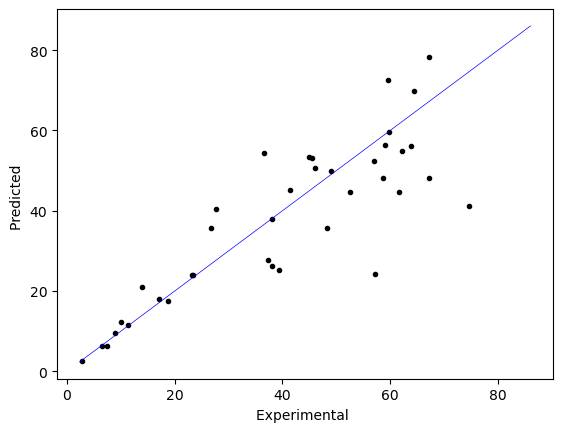

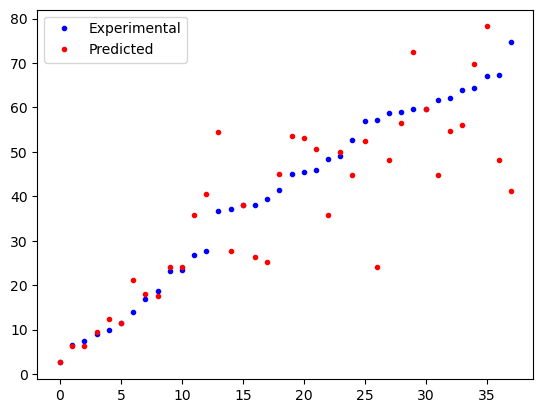

Run # 1 Fold # 2
Pearson CC: 0.9640218996069472
R2 score: 0.925718634961477
RMSE: 6.373531879325314
MAE: 4.860672334541098


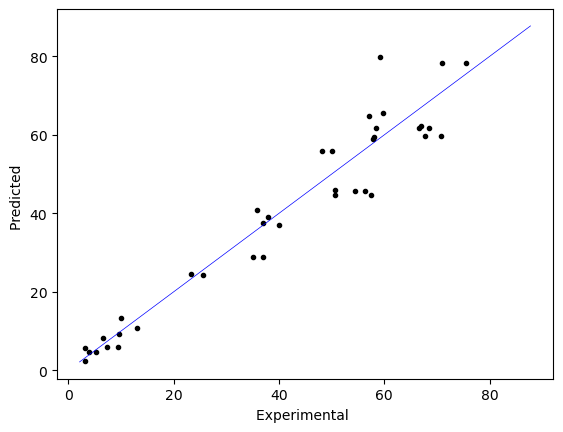

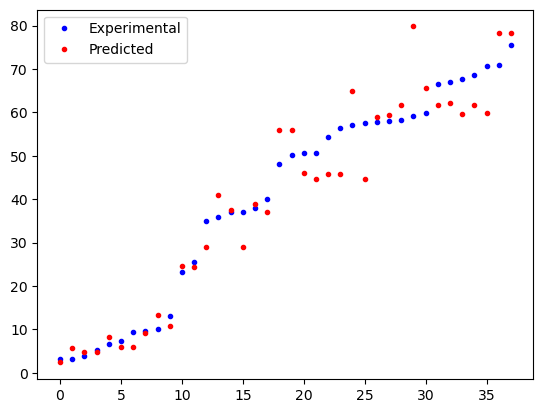

Run # 1 Fold # 3
Pearson CC: 0.9536354959003164
R2 score: 0.9040290970459532
RMSE: 7.811699479828363
MAE: 5.1425321835394495


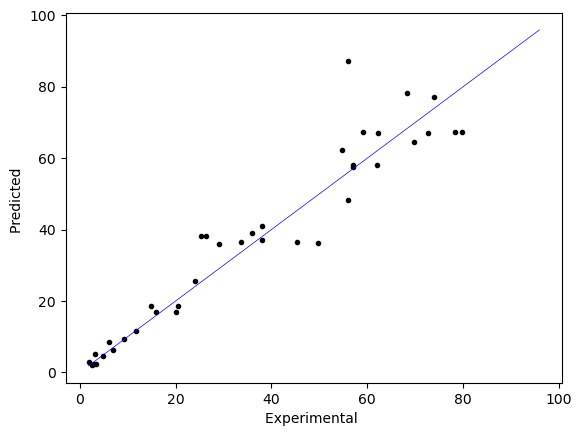

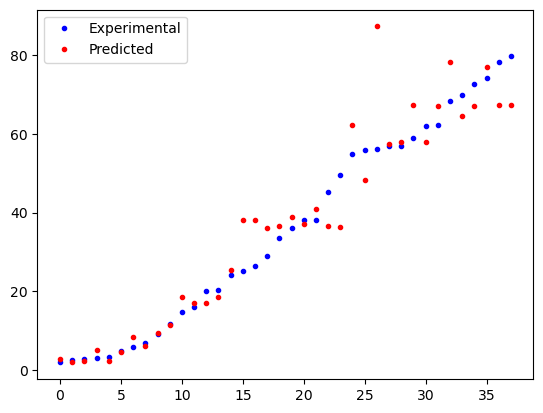

Run # 1 Fold # 4
Pearson CC: 0.8416437647501493
R2 score: 0.6962442464157809
RMSE: 11.801974388908992
MAE: 6.86504335728696


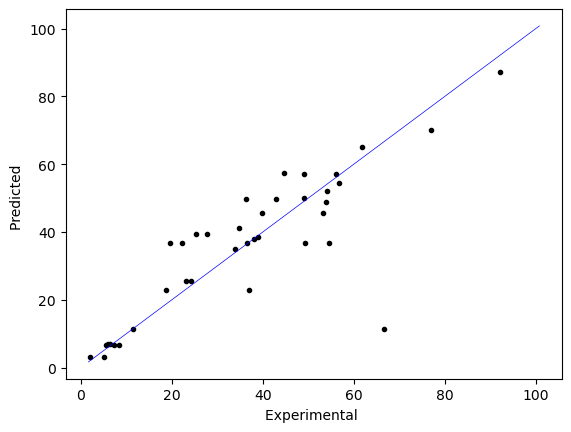

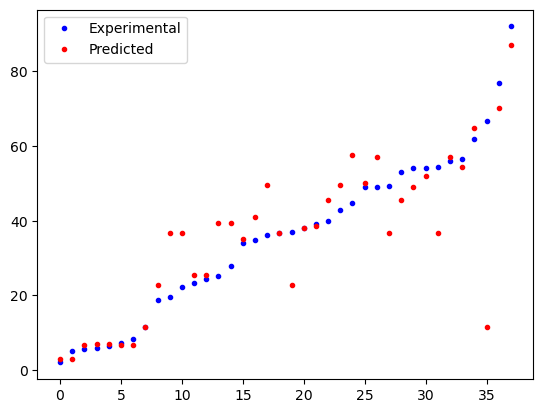

Run # 1 Fold # 5
Pearson CC: 0.9025429608653474
R2 score: 0.7902916344501844
RMSE: 9.229066919057132
MAE: 5.815981052849519


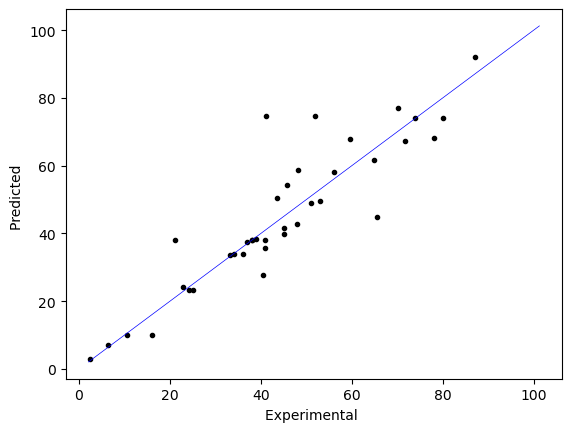

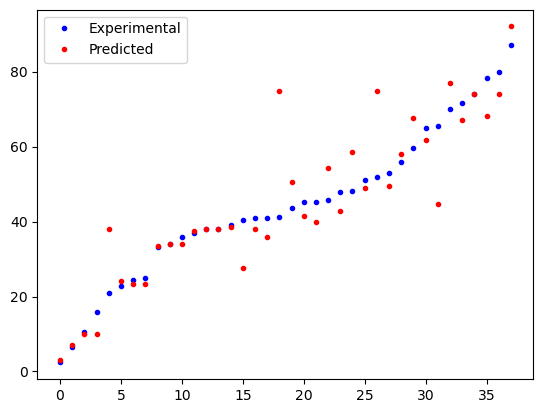

In [66]:
# Decision Tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
MSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = StandardScaler()
            x_train = scale.fit_transform(x_train)
            x_test = scale.transform(x_test)

            # Initialize the Decision Tree Regressor
            regressor = DecisionTreeRegressor()

            # Train the model
            regressor.fit(x_train, y_train)

            # Make predictions on the testing set
            y_pred = regressor.predict(x_test)

            # Evaluation
            R2_score[j, i] = r2_score(y_test, y_pred)
            PearsonCC[j, i] =  pearsonr(y_test, np.squeeze(y_pred))[0]
            MSE[j, i] = np.sqrt(mean_squared_error(y_test, y_pred))
            MAE[j, i] = mean_absolute_error(y_test, y_pred)

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {MSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')


            # Parity plot, actual versus predicted values
            plt.plot(y_test, y_pred, 'k.')
            bounds = (min(y_test.min(), y_pred.min()) - 0.1*y_pred.min(), max(y_test.max(), y_pred.max())+ 0.1 * y_pred.max())
            plt.plot([bounds[0], bounds[1]], [bounds[0], bounds[1]],'b-', linewidth=0.5, label="Parity Line") # identity line
            plt.xlabel("Experimental ", fontsize=10)
            plt.ylabel("Predicted ", fontsize=10)
            plt.show()

            plt.plot(np.array(y_test), 'b.', label='Experimental')
            plt.plot(np.array(y_pred), 'r.', label='Predicted')
            plt.legend()
            plt.show()



In [67]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'MSE': MSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,MSE,MAE
0,0.847802,0.697335,11.329935,7.917029
1,0.964022,0.925719,6.373532,4.860672
2,0.953635,0.904029,7.811699,5.142532
3,0.841644,0.696244,11.801974,6.865043
4,0.902543,0.790292,9.229067,5.815981


In [68]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
MSE_mean = np.mean(MSE)
MAE_mean = np.mean(MAE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
MSE_std = np.std(MSE)
MAE_std = np.std(MAE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'MSE Mean': MSE_mean, 'MSE Std': MSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std },index=[0])

df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,MSE Mean,MSE Std,MAE Mean,MAE Std
0,0.901929,0.051173,0.802724,0.097969,9.309242,2.057395,6.120251,1.132976


Run # 1 Fold # 1
Pearson CC: 0.8201862608195793
R2 score: 0.6720444478883927
RMSE: 11.793799813181312
MAE: 8.728740798304033


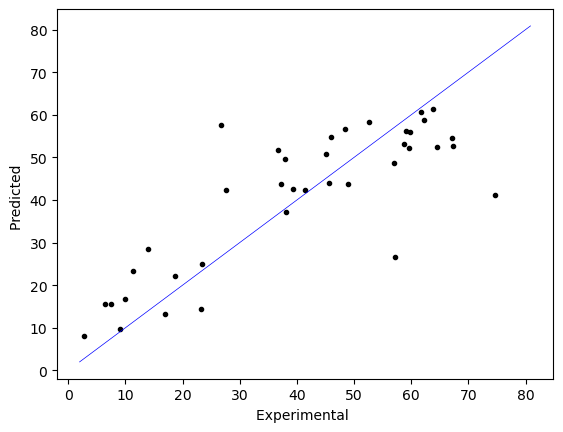

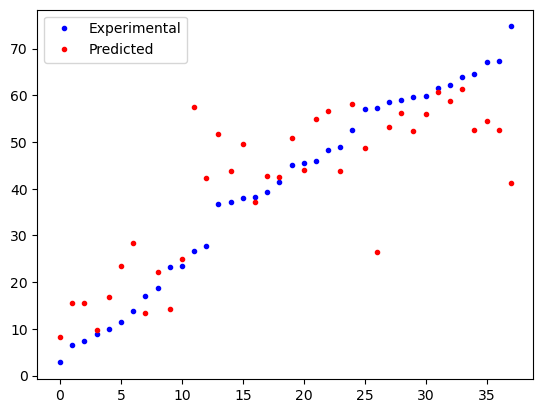

Run # 1 Fold # 2
Pearson CC: 0.9328755194343701
R2 score: 0.8591139893976925
RMSE: 8.777567142742726
MAE: 6.469022466018734


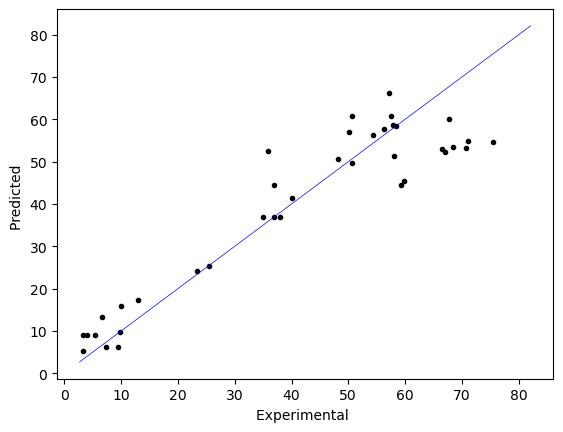

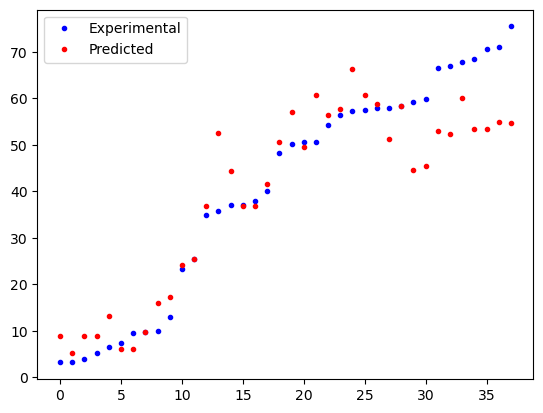

Run # 1 Fold # 3
Pearson CC: 0.9135654637498463
R2 score: 0.823851219351823
RMSE: 10.583164765197441
MAE: 8.066459809432677


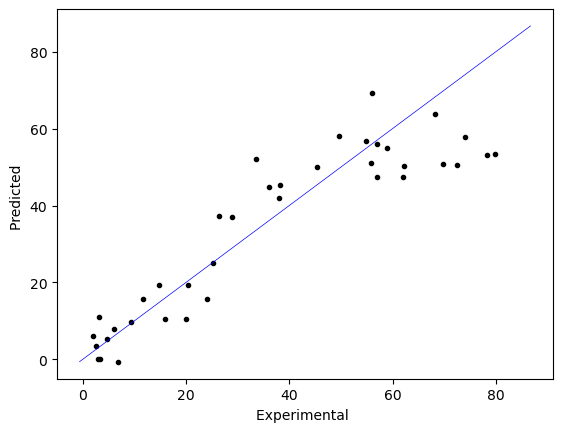

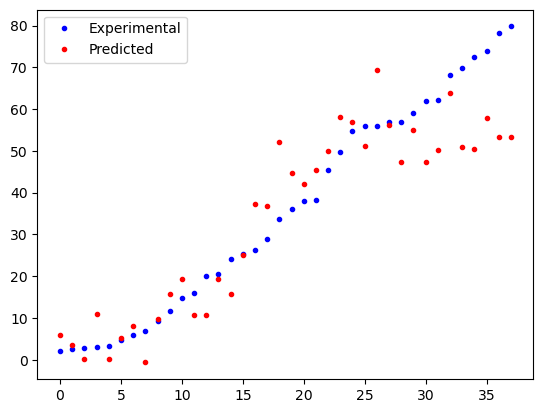

Run # 1 Fold # 4
Pearson CC: 0.7688586000853332
R2 score: 0.554553050067222
RMSE: 14.291914394627147
MAE: 10.713945892586842


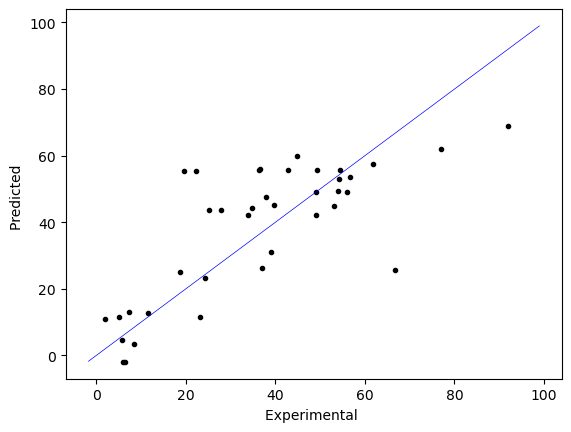

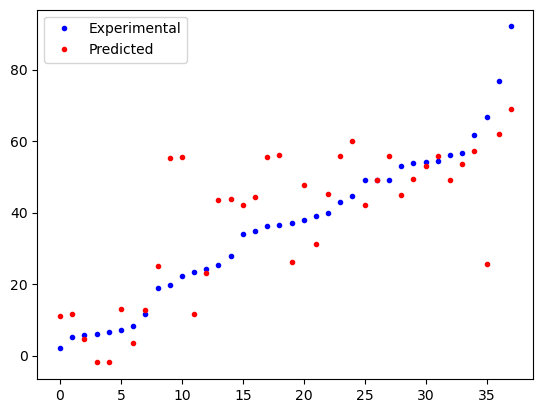

Run # 1 Fold # 5
Pearson CC: 0.8527789471949776
R2 score: 0.7112589154635951
RMSE: 10.829395354361543
MAE: 8.34479517962059


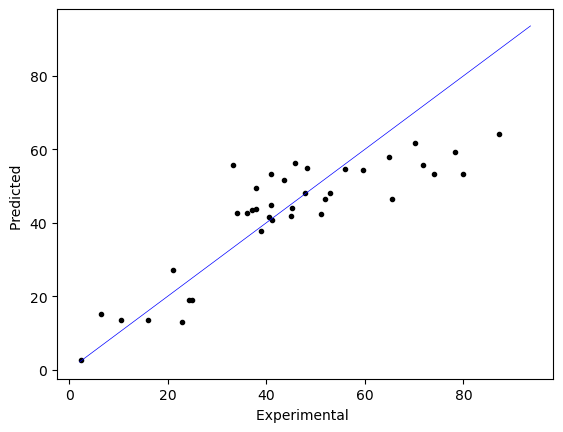

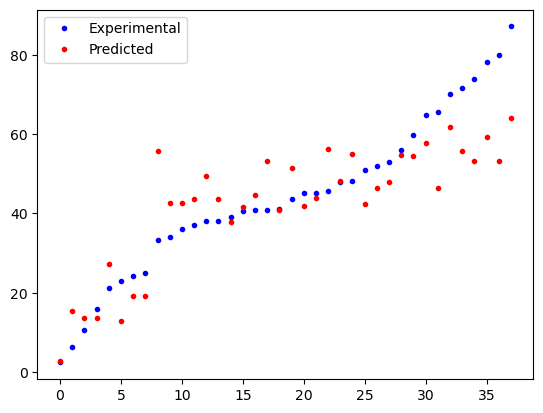

In [69]:
# SVM

from sklearn.svm import SVR

nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
MSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = StandardScaler()
            x_train = scale.fit_transform(x_train)
            x_test = scale.transform(x_test)

            svm_regressor = SVR(kernel='linear')

            svm_regressor.fit(x_train, y_train)

            y_pred = svm_regressor.predict(x_test)

            # Evaluation
            R2_score[j, i] = r2_score(y_test, y_pred)
            PearsonCC[j, i] =  pearsonr(y_test, np.squeeze(y_pred))[0]
            MSE[j, i] = np.sqrt(mean_squared_error(y_test, y_pred))
            MAE[j, i] = mean_absolute_error(y_test, y_pred)

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {MSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')


            # Parity plot, actual versus predicted values
            plt.plot(y_test, y_pred, 'k.')
            bounds = (min(y_test.min(), y_pred.min()) - 0.1*y_pred.min(), max(y_test.max(), y_pred.max())+ 0.1 * y_pred.max())
            plt.plot([bounds[0], bounds[1]], [bounds[0], bounds[1]],'b-', linewidth=0.5, label="Parity Line") # identity line
            plt.xlabel("Experimental ", fontsize=10)
            plt.ylabel("Predicted ", fontsize=10)
            plt.show()

            plt.plot(np.array(y_test), 'b.', label='Experimental')
            plt.plot(np.array(y_pred), 'r.', label='Predicted')
            plt.legend()
            plt.show()



In [70]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'MSE': MSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,MSE,MAE
0,0.820186,0.672044,11.793800,8.728741
1,0.932876,0.859114,8.777567,6.469022
2,0.913565,0.823851,10.583165,8.066460
3,0.768859,0.554553,14.291914,10.713946
4,0.852779,0.711259,10.829395,8.344795


In [71]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
MSE_mean = np.mean(MSE)
MAE_mean = np.mean(MAE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
MSE_std = np.std(MSE)
MAE_std = np.std(MAE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'MSE Mean': MSE_mean, 'MSE Std': MSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std },index=[0])

df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,MSE Mean,MSE Std,MAE Mean,MAE Std
0,0.857653,0.060161,0.724164,0.109362,11.255168,1.804623,8.464593,1.362683


Run # 1 Fold # 1
Pearson CC: 0.8729013711570802
R2 score: 0.7605078258498865
RMSE: 10.078407664902569
MAE: 6.909115746688844


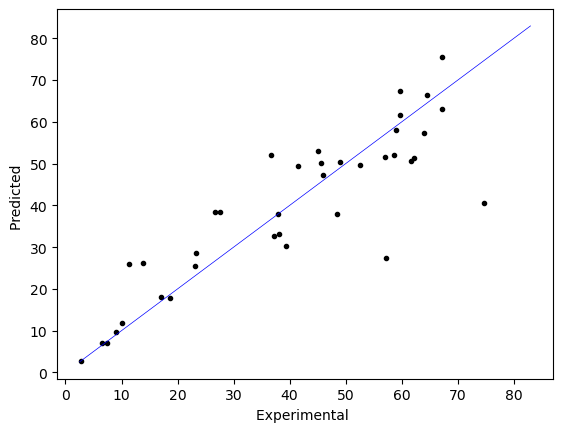

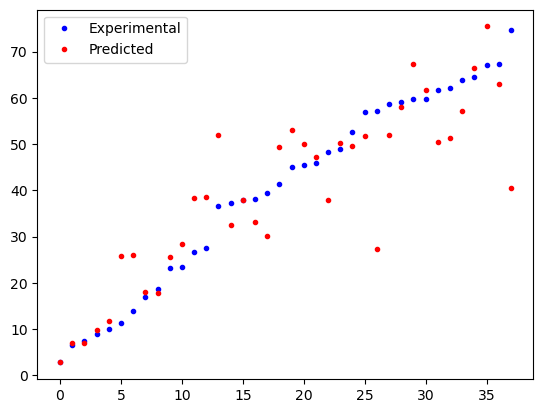

Run # 1 Fold # 2
Pearson CC: 0.9767871498516456
R2 score: 0.953644902152616
RMSE: 5.034878276475043
MAE: 3.8663807948945443


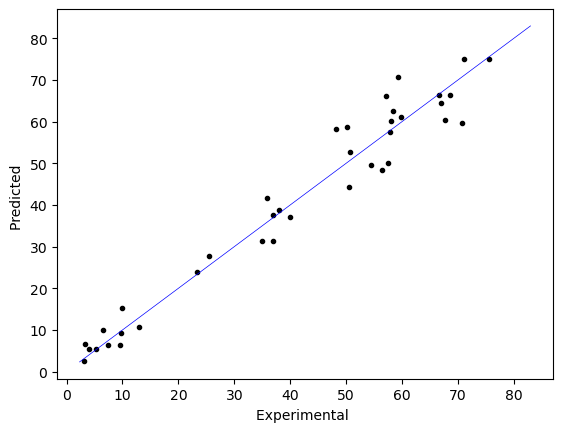

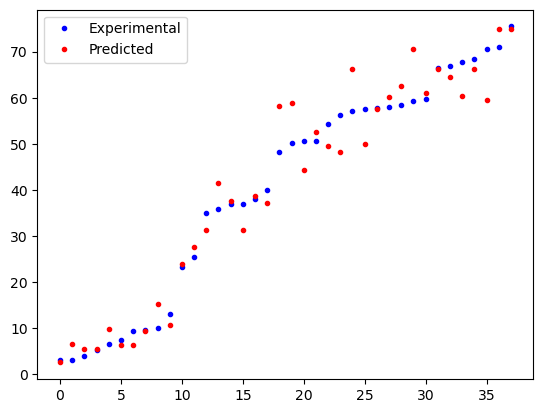

Run # 1 Fold # 3
Pearson CC: 0.9625582852493668
R2 score: 0.9243735249821998
RMSE: 6.93446029824293
MAE: 4.389870913872622


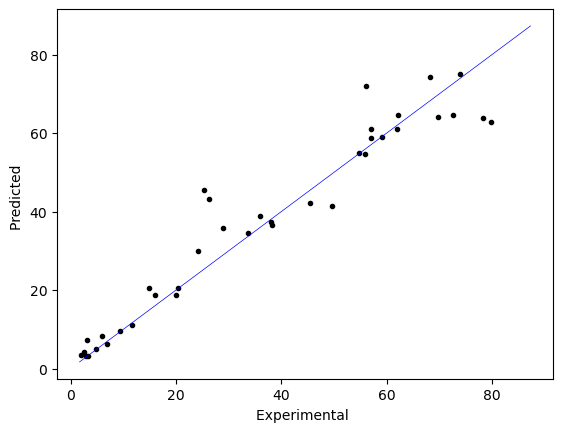

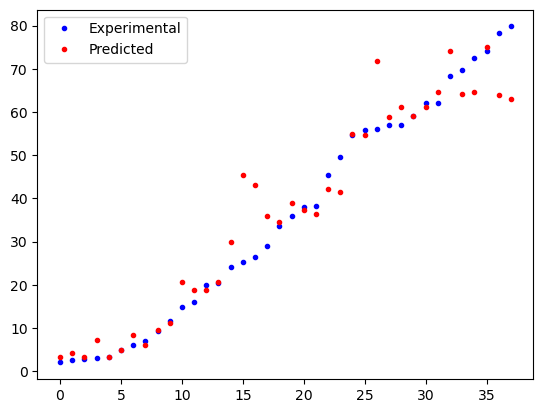

Run # 1 Fold # 4
Pearson CC: 0.8214250043651379
R2 score: 0.6709009802823264
RMSE: 12.284449682065697
MAE: 8.36911520397642


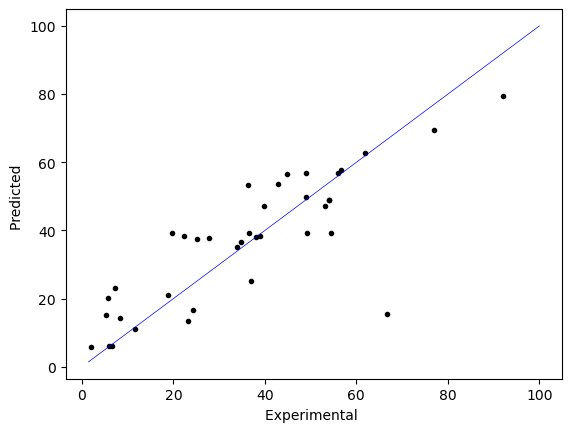

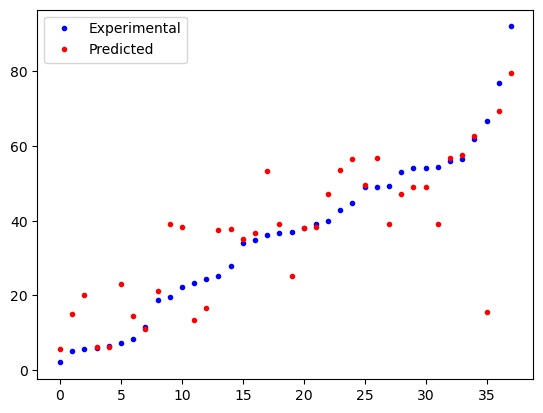

Run # 1 Fold # 5
Pearson CC: 0.9560134892508823
R2 score: 0.9134756813783214
RMSE: 5.928147641470864
MAE: 4.331426668329997


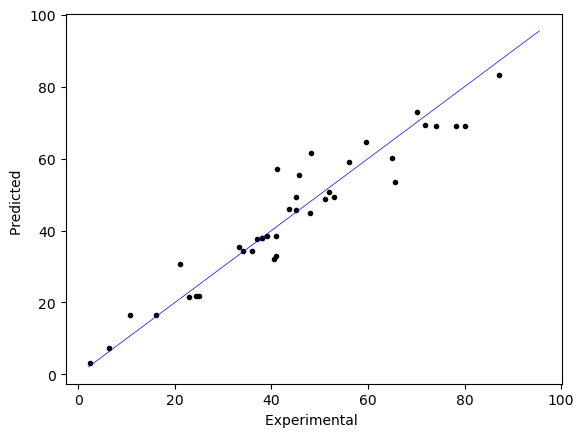

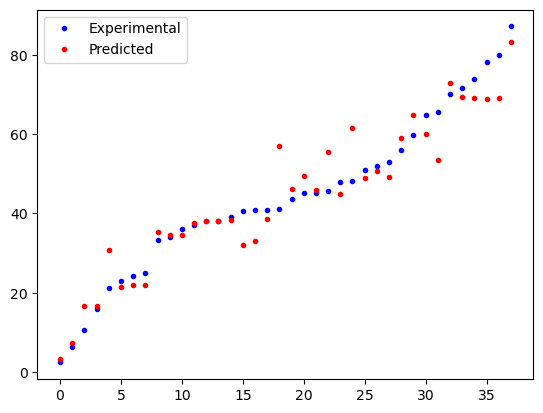

In [72]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
MSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = StandardScaler()
            x_train = scale.fit_transform(x_train)
            x_test = scale.transform(x_test)

            # Initialize Random Forest Regressor
            rf_regressor = RandomForestRegressor(n_estimators=10000, random_state=123)
            # Train the model
            rf_regressor.fit(x_train, y_train)

            # Make predictions on the testing set
            y_pred = rf_regressor.predict(x_test)

            # Evaluation
            R2_score[j, i] = r2_score(y_test, y_pred)
            PearsonCC[j, i] =  pearsonr(y_test, np.squeeze(y_pred))[0]
            MSE[j, i] = np.sqrt(mean_squared_error(y_test, y_pred))
            MAE[j, i] = mean_absolute_error(y_test, y_pred)

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {MSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')


            # Parity plot, actual versus predicted values
            plt.plot(y_test, y_pred, 'k.')
            bounds = (min(y_test.min(), y_pred.min()) - 0.1*y_pred.min(), max(y_test.max(), y_pred.max())+ 0.1 * y_pred.max())
            plt.plot([bounds[0], bounds[1]], [bounds[0], bounds[1]],'b-', linewidth=0.5, label="Parity Line") # identity line
            plt.xlabel("Experimental ", fontsize=10)
            plt.ylabel("Predicted ", fontsize=10)
            plt.show()

            plt.plot(np.array(y_test), 'b.', label='Experimental')
            plt.plot(np.array(y_pred), 'r.', label='Predicted')
            plt.legend()
            plt.show()


In [73]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'MSE': MSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,MSE,MAE
0,0.872901,0.760508,10.078408,6.909116
1,0.976787,0.953645,5.034878,3.866381
2,0.962558,0.924374,6.934460,4.389871
3,0.821425,0.670901,12.284450,8.369115
4,0.956013,0.913476,5.928148,4.331427


In [74]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
MSE_mean = np.mean(MSE)
MAE_mean = np.mean(MAE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
MSE_std = np.std(MSE)
MAE_std = np.std(MAE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'MSE Mean': MSE_mean, 'MSE Std': MSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std },index=[0])

df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,MSE Mean,MSE Std,MAE Mean,MAE Std
0,0.917937,0.06041,0.844581,0.109765,8.052069,2.715976,5.573182,1.758256


In [75]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
MSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)
for n in range (1,11):
    print('k-neighbor:'+ str(n) )
    for j in range(nruns):

            kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

            for i, (tr, ts) in enumerate(kf.split(targets)):

                # Display the run number
                print('Run #', j+1, "Fold #", i+1)

                x_train, x_test = features.iloc[tr], features.iloc[ts]
                y_train, y_test = targets[tr], targets[ts]

                scale = StandardScaler()
                x_train = scale.fit_transform(x_train)
                x_test = scale.transform(x_test)



                # Initialize KNeighborsRegressor
                knn_regressor = KNeighborsRegressor(n_neighbors=n)  # You can adjust the number of neighbors (k)

                # Train the model
                knn_regressor.fit(x_train, y_train)

                # Make predictions on the testing set
                y_pred = knn_regressor.predict(x_test)

                # Evaluation
                R2_score[j, i] = r2_score(y_test, y_pred)
                PearsonCC[j, i] =  pearsonr(y_test, np.squeeze(y_pred))[0]
                MSE[j, i] = np.sqrt(mean_squared_error(y_test, y_pred))
                MAE[j, i] = mean_absolute_error(y_test, y_pred)

                print(f'Pearson CC: {PearsonCC[j, i]}')
                print(f'R2 score: {R2_score[j, i]}')
                print(f'RMSE: {MSE[j, i]}')
                print(f'MAE: {MAE[j, i]}')

        # # Data frame
    df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'MSE': MSE.flatten(),
                        'MAE': MAE.flatten()},index=None)
        # Calculate mean values and standard deviations of the scores
    PearsonCC_mean = np.mean(PearsonCC)
    R2_score_mean = np.mean(R2_score)
    MSE_mean = np.mean(MSE)
    MAE_mean = np.mean(MAE)

    PearsonCC_std = np.std(PearsonCC)
    R2_score_std = np.std(R2_score)
    MSE_std = np.std(MSE)
    MAE_std = np.std(MAE)

    # Data frame
    df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                    'MSE Mean': MSE_mean, 'MSE Std': MSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std },index=[0])

    print(df2)



k-neighbor:1
Run # 1 Fold # 1
Pearson CC: 0.6898244035970913
R2 score: 0.38875039804348677
RMSE: 16.10110019811155
MAE: 11.182507290935542
Run # 1 Fold # 2
Pearson CC: 0.9242954643867214
R2 score: 0.8442929400786284
RMSE: 9.227719331017456
MAE: 6.495388636455096
Run # 1 Fold # 3
Pearson CC: 0.9030190690168676
R2 score: 0.7919931665143158
RMSE: 11.500442165583097
MAE: 6.6093073723816556
Run # 1 Fold # 4
Pearson CC: 0.7566038619022191
R2 score: 0.5461766548259305
RMSE: 14.425664508747172
MAE: 9.8583924477177
Run # 1 Fold # 5
Pearson CC: 0.8992683563496672
R2 score: 0.7741591268525586
RMSE: 9.577478581588304
MAE: 6.471150410828495
   Pearson CC Mean  Pearson CC Std  R2 Score Mean  R2 Score Std   MSE Mean  \
0         0.834602        0.093757       0.669074      0.173516  12.166481   

    MSE Std  MAE Mean   MAE Std  
0  2.696961  8.123349  2.002057  
k-neighbor:2
Run # 1 Fold # 1
Pearson CC: 0.8075274235544051
R2 score: 0.6317993446566884
RMSE: 12.496504115995632
MAE: 8.131678196871043
R

In [76]:
# NN
import math
import numpy as np
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, Add
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from tensorflow.keras.losses import MeanSquaredError


nruns = 1
nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)


for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            x_train, x_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = StandardScaler()
            x_train = scale.fit_transform(x_train)
            x_test = scale.transform(x_test)

            #y_train_log = np.log10(y_train)
            #y_test_log = np.log10(y_test)

            # define DNN
            input_layer = Input(shape=(38,))
            x = Dense(512, activation='relu')(input_layer)
            x = Dropout(0.2)(x)
            residual1 = x  # Save the residual connection
            x = Dense(512, activation='relu')(x)
            x = Dropout(0.2)(x)
            x = Add()([x, residual1])  # Add first residual connection
            residual2 = x  # Save the residual connection
            x = Dense(512, activation='relu')(x)
            x = Dropout(0.2)(x)
            x = Add()([x, residual2])  # Add first residual connection
            residual3 = x  # Save the residual connection
            x = Dense(512, activation='relu')(x)
            x = Dropout(0.2)(x)
            x = Add()([x, residual3])  # Add first residual connection
            output_layer = Dense(1, activation='linear')(x)

            # Create the model
            model = Model(inputs=input_layer, outputs=output_layer)

            model.compile(optimizer='Adam', loss=MeanSquaredError())

            # learning rate scheduler
            INITIAL_LEARNING_RATE = 0.001
            EPOCHS_NUM = 600
            def lr_step_decay(epoch, lr):
                drop_rate = 0.1
                epochs_drop = 200
                return INITIAL_LEARNING_RATE * math.pow(drop_rate, math.floor(epoch/epochs_drop))

            callbacks=[LearningRateScheduler(lr_step_decay, verbose=0)]

            history = model.fit(x_train, y_train, batch_size=16, epochs=EPOCHS_NUM,
                    validation_split=0.2, verbose=0, callbacks=callbacks)

            # Plot the loss and the predictions
            train_loss = history.history['loss']
            val_loss = history.history['val_loss']
            # y_pred = 10**(model.predict(x_test, verbose=0))
            y_pred = model.predict(x_test, verbose=0)

            # Evaluation
            R2_score[j, i] = r2_score(y_test, y_pred)
            PearsonCC[j, i] =  pearsonr(y_test, np.squeeze(y_pred))[0]
            RMSE[j, i] = np.sqrt(mean_squared_error(y_test, y_pred))
            MAE[j, i] = mean_absolute_error(y_test, y_pred)

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')





Run # 1 Fold # 1
Pearson CC: 0.8927599552326912
R2 score: 0.7494890367326532
RMSE: 10.3076491207064
MAE: 6.898693095405992
Run # 1 Fold # 2
Pearson CC: 0.9283857875133322
R2 score: 0.7980272974855502
RMSE: 10.509609094884054
MAE: 6.7752669449192435
Run # 1 Fold # 3
Pearson CC: 0.9562943093782057
R2 score: 0.9070594682889253
RMSE: 7.687379359293741
MAE: 5.0328286526250565
Run # 1 Fold # 4
Pearson CC: 0.8195321612123394
R2 score: 0.6512203292154028
RMSE: 12.646431416695114
MAE: 8.096244305949174
Run # 1 Fold # 5
Pearson CC: 0.9107588781356771
R2 score: 0.8070586867037814
RMSE: 8.852430635801568
MAE: 6.032138867941408


In [77]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.892760,0.749489,10.307649,6.898693
1,0.928386,0.798027,10.509609,6.775267
2,0.956294,0.907059,7.687379,5.032829
3,0.819532,0.651220,12.646431,8.096244
4,0.910759,0.807059,8.852431,6.032139


In [78]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)


PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)


# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'RMSE Std': RMSE_std},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,0.901546,0.046057,0.782571,0.083287,10.0007,1.674699,6.567034,1.013089
